## EDA

In [1]:
import pandas as pd
df = pd.read_csv("../data/final/viviendas_2011_2024.csv")

In [2]:
df.head()              

,Ano,Distrito,Esperanza_vida,Renta_neta_persona,Renta_neta_hogar,Renta_bruta_persona,Renta_bruta_hogar,Edad_media,Mayores_65anos%,Menores_18anos%,...,Terraza,Planta,Exterior,Ascensor,Ano_construccion,Ano_reforma,Tipo_vivienda,Banos,Precio_predicho,Precio_ajustado
0,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,0.0,False,False,NaN,NaN,apartamento,1,672.875811,657.471490
1,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,5.0,True,True,NaN,NaN,apartamento,1,923.555035,894.792822
2,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,3.0,True,True,1910.0,NaN,apartamento,2,1424.913483,1434.552312
3,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,4.0,True,True,NaN,NaN,apartamento,1,2240.808388,2335.359589
4,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,3.0,True,True,1940.0,NaN,apartamento,1,1583.237203,1571.481771


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209216 entries, 0 to 209215
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Ano                       209216 non-null  int64  
 1   Distrito                  209216 non-null  object 
 2   Esperanza_vida            209216 non-null  float64
 3   Renta_neta_persona        119552 non-null  float64
 4   Renta_neta_hogar          119552 non-null  float64
 5   Renta_bruta_persona       119552 non-null  float64
 6   Renta_bruta_hogar         119552 non-null  float64
 7   Edad_media                119552 non-null  float64
 8   Mayores_65anos%           119552 non-null  float64
 9   Menores_18anos%           119552 non-null  float64
 10  Tamano_vivienda_personas  119552 non-null  float64
 11  Paro_registrado%          119552 non-null  float64
 12  Apartamentos_turisticos   149440 non-null  float64
 13  Superficie_distrito_ha    209216 non-null  f

* Variables socioeconómicas (119.552 valores, no todos completos):
Renta_neta_persona, Renta_bruta_hogar, Edad_media, % Mayores_65, % Menores_18, Paro_registrado%, etc.
Hay ~90.000 valores faltantes en estas columnas.

* Variables urbanísticas:
Superficie_distrito_ha, Densidad_poblacion, Zonas_verdes%.

* Características de la vivienda:
Habitaciones, Baños, Tamaño, Garaje, Piscina, Trastero, Terraza, Ascensor, Exterior, Planta.
Aquí prácticamente no hay valores nulos (salvo Planta con ~19k nulos).

* Variables temporales:
Año, Ano_construccion (muchos nulos), Ano_reforma (casi todo nulo).

* Variables de precio:
Precio_predicho y Precio_ajustado (variable más importante a analizar).

In [4]:
# Columnas que faltan mas datos
df.isna().sum().sort_values(ascending=False)

Ano_reforma                 208362
Ano_construccion            204582
Renta_neta_persona           89664
Renta_bruta_hogar            89664
Edad_media                   89664
Tamano_vivienda_personas     89664
Renta_bruta_persona          89664
Renta_neta_hogar             89664
Densidad_poblacion           89664
Paro_registrado%             89664
Menores_18anos%              89664
Mayores_65anos%              89664
Apartamentos_turisticos      59776
Planta                       19082
Distrito                         0
Esperanza_vida                   0
Zonas_verdes%                    0
Superficie_distrito_ha           0
Ano                              0
Habitaciones                     0
Garaje                           0
Trastero                         0
Tamano                           0
Operacion                        0
Terraza                          0
Piscina                          0
Ascensor                         0
Exterior                         0
Tipo_vivienda       

In [5]:
(df.isna().mean()*100).sort_values(ascending=False)

Ano_reforma                 99.591809
Ano_construccion            97.785064
Renta_neta_persona          42.857143
Renta_bruta_hogar           42.857143
Edad_media                  42.857143
Tamano_vivienda_personas    42.857143
Renta_bruta_persona         42.857143
Renta_neta_hogar            42.857143
Densidad_poblacion          42.857143
Paro_registrado%            42.857143
Menores_18anos%             42.857143
Mayores_65anos%             42.857143
Apartamentos_turisticos     28.571429
Planta                       9.120717
Distrito                     0.000000
Esperanza_vida               0.000000
Zonas_verdes%                0.000000
Superficie_distrito_ha       0.000000
Ano                          0.000000
Habitaciones                 0.000000
Garaje                       0.000000
Trastero                     0.000000
Tamano                       0.000000
Operacion                    0.000000
Terraza                      0.000000
Piscina                      0.000000
Ascensor    

**Altos porcentajes de nulos**

- Ano_reforma: 208k nulos, casi todo el dataset.
Esta variable probablemente no sea útil, salvo que se quiera analizar reformas puntuales. Podría eliminarse o imputarse como "Sin reforma".

- Ano_construccion: 204k nulos, muchos faltantes.
Similar al anterior, puede usarse parcialmente o imputarse con alguna media/mediana por distrito.

**Bloque socioeconómico (~90k nulos cada uno):**

- Tamano_vivienda_personas, Densidad_poblacion, Renta_neta_persona, Renta_bruta_hogar, Edad_media, % Mayores_65, % Menores_18, Paro_registrado%.
Aquí parece que solo hay datos para ciertos distritos o años, habría que analizar si se concentran en un periodo específico o en distritos concretos.

**Variables urbanísticas / de contexto**

- Apartamentos_turisticos: ~59k nulos

- Planta: ~19k nulos. Podría imputarse como “desconocido” o ignorarse.

In [6]:
(df[(df['Ano'] >= 2015) & (df['Ano'] <= 2022)].isna().mean()*100).sort_values(ascending=False)

Ano_reforma                 99.591809
Ano_construccion            97.785064
Planta                       9.120717
Ano                          0.000000
Renta_neta_hogar             0.000000
Distrito                     0.000000
Esperanza_vida               0.000000
Renta_neta_persona           0.000000
Mayores_65anos%              0.000000
Menores_18anos%              0.000000
Tamano_vivienda_personas     0.000000
Paro_registrado%             0.000000
Apartamentos_turisticos      0.000000
Renta_bruta_persona          0.000000
Renta_bruta_hogar            0.000000
Edad_media                   0.000000
Zonas_verdes%                0.000000
Densidad_poblacion           0.000000
Superficie_distrito_ha       0.000000
Habitaciones                 0.000000
Garaje                       0.000000
Trastero                     0.000000
Tamano                       0.000000
Operacion                    0.000000
Terraza                      0.000000
Piscina                      0.000000
Ascensor    

Entre los años 2015 y 2022 no hay nulos de variables socioeconómicas, por lo que se usará para el entrenamiento de modelos.

### Columnas Ano_construccion y Ano_reforma

Existen más del 95% de nulos en ambas columnas, por lo que imputarlos no sería útil. Por tanto, se eliminan del dataset.

In [7]:
df = df.drop(columns=['Ano_construccion', 'Ano_reforma'])

### Outliers en variables numéricas
Validación de outliers por tipo de operación


--- ALQUILER ---
Registros totales: 80584
Outliers detectados: 5710
Rango aceptado: -373.67 - 2723.72


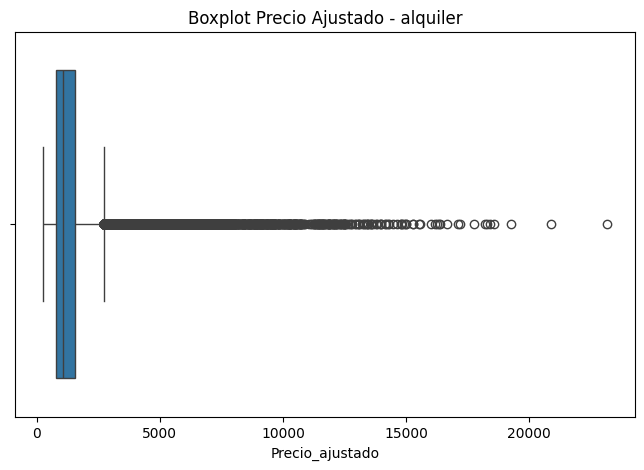


--- VENTA ---
Registros totales: 128632
Outliers detectados: 9803
Rango aceptado: -386384.39 - 1063657.11


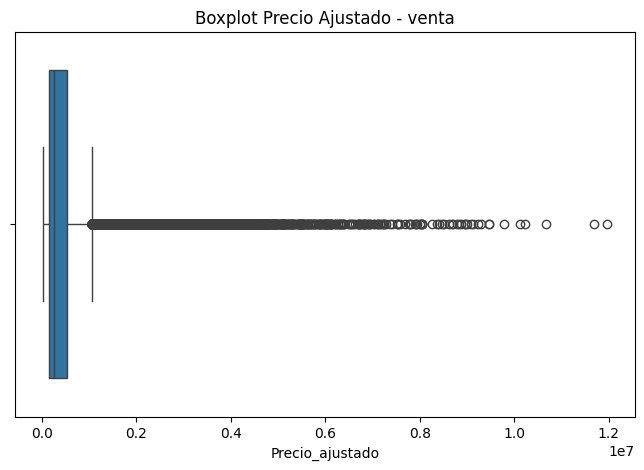

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def detectar_outliers(col, subset):
    q1 = subset[col].quantile(0.25)
    q3 = subset[col].quantile(0.75)
    iqr = q3 - q1
    low  = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    outliers = subset[(subset[col] < low) | (subset[col] > high)]
    return outliers, low, high

# Separar por operación
for oper in df["Operacion"].unique():
    subset = df[df["Operacion"] == oper]
    outliers, low, high = detectar_outliers("Precio_ajustado", subset)

    print(f"\n--- {oper.upper()} ---")
    print(f"Registros totales: {subset.shape[0]}")
    print(f"Outliers detectados: {outliers.shape[0]}")
    print(f"Rango aceptado: {low:.2f} - {high:.2f}")

    # Visualización
    plt.figure(figsize=(8,5))
    sns.boxplot(x=subset["Precio_ajustado"])
    plt.title(f"Boxplot Precio Ajustado - {oper}")
    plt.show()

**Conclusión sobre Precio_ajustado en alquiler**

- El rango intercuartílico (IQR) determina un intervalo de precios aceptado entre aproximadamente 0 € y 2.723 € al mes.
- Se detectaron 5.710 outliers (≈ 7,1% del total de registros de alquiler).
- También se observa que el límite inferior calculado fue negativo (-373 €), lo cual no tiene sentido en un alquiler → se interpreta como un efecto del método IQR en datos sesgados.

**Conclusión sobre Precio_ajustado en venta**

- El rango intercuartílico (IQR) establece un intervalo de precios aceptado entre 0 € y ~1.064.000 €.
- Se detectaron 9.803 outliers (≈ 7,6% de los registros de venta).
- El límite inferior calculado es negativo (-386.384 €), lo cual no tiene sentido → se interpreta como efecto del IQR con distribución muy sesgada.
- Se observan precios extremos que superan los 10 millones de euros (hasta ~12 millones), que muy probablemente corresponden a propiedades excepcionales que distorsionan el análisis general.

### Tratamiento de los outliers de alquiler

- Capado por percentiles (P1–P99) → creamos Precio_ajustado_cap.
- Bandera de outlier → Precio_alquiler_outlier (1 si es outlier, 0 si no).

In [363]:
# Filtrar solo alquiler
alquiler = df[df["Operacion"]=="alquiler"]["Precio_ajustado"]

# 1) Definir percentiles P1 y P99
p1 = alquiler.quantile(0.01)
p99 = alquiler.quantile(0.99)

print(f"Rango para capado (P1–P99): {p1:.2f} - {p99:.2f}")

# 2) Crear columna capada
df.loc[df["Operacion"]=="alquiler", "Precio_ajustado_cap"] = \
    df.loc[df["Operacion"]=="alquiler", "Precio_ajustado"].clip(lower=p1, upper=p99)

# 3) Crear flag de outlier en alquiler
df["Precio_alquiler_outlier"] = 0
df.loc[(df["Operacion"]=="alquiler") & 
       ((df["Precio_ajustado"] < p1) | (df["Precio_ajustado"] > p99)), 
       "Precio_alquiler_outlier"] = 1

# 4) Verificación
print("Total outliers alquiler (flag=1):", df["Precio_alquiler_outlier"].sum())
print(df[["Operacion","Precio_ajustado","Precio_ajustado_cap","Precio_alquiler_outlier"]].head(10))


Rango para capado (P1–P99): 121.11 - 15917.40
Total outliers alquiler (flag=1): 1612
  Operacion  Precio_ajustado  Precio_ajustado_cap  Precio_alquiler_outlier
0  alquiler       273.451180           273.451180                        0
1  alquiler       658.904151           658.904151                        0
2  alquiler      1235.355920          1235.355920                        0
3  alquiler      3824.713402          3824.713402                        0
4  alquiler      2087.522735          2087.522735                        0
5  alquiler       291.919561           291.919561                        0
6  alquiler      1930.243625          1930.243625                        0
7  alquiler       507.244195           507.244195                        0
8  alquiler       627.924932           627.924932                        0
9  alquiler       747.075773           747.075773                        0


In [364]:
# Filtrar solo venta
venta = df[df["Operacion"]=="venta"]["Precio_ajustado"]

# 1) Percentiles P1 y P99
p1 = venta.quantile(0.01)
p99 = venta.quantile(0.99)

print(f"Rango para capado (P1–P99): {p1:.2f} - {p99:.2f}")

# 2) Columna capada
df.loc[df["Operacion"]=="venta", "Precio_ajustado_cap"] = \
    df.loc[df["Operacion"]=="venta", "Precio_ajustado"].clip(lower=p1, upper=p99)

# 3) Flag de outlier
df["Precio_venta_outlier"] = 0
df.loc[(df["Operacion"]=="venta") & 
       ((df["Precio_ajustado"] < p1) | (df["Precio_ajustado"] > p99)),
       "Precio_venta_outlier"] = 1

# 4) Verificación
print("Total outliers venta (flag=1):", df["Precio_venta_outlier"].sum())
print(df[df["Operacion"]=="venta"][["Precio_ajustado","Precio_ajustado_cap","Precio_venta_outlier"]].head(10))


Rango para capado (P1–P99): 22154.54 - 5931286.57
Total outliers venta (flag=1): 2574
     Precio_ajustado  Precio_ajustado_cap  Precio_venta_outlier
438     3.295059e+05         3.295059e+05                     0
439     3.893730e+05         3.893730e+05                     0
440     1.020426e+06         1.020426e+06                     0
441     7.745758e+05         7.745758e+05                     0
442     2.846451e+05         2.846451e+05                     0
443     1.028324e+06         1.028324e+06                     0
444     1.000933e+06         1.000933e+06                     0
445     7.745758e+05         7.745758e+05                     0
446     2.846451e+05         2.846451e+05                     0
447     5.054740e+05         5.054740e+05                     0


### Comprobación adicional del dataset

In [365]:
# Revisión de nulos

print("Nulos totales por columna (top 15):")
print(df.isna().sum().sort_values(ascending=False).head(15))

Nulos totales por columna (top 15):
Planta                         19082
Densidad_poblacion_na              0
Ascensor                           0
Ano_construccion                   0
Ano_reforma                        0
Tipo_vivienda                      0
Banos                              0
Precio_predicho                    0
Precio_ajustado                    0
Tamano_vivienda_personas_na        0
Paro_registrado%_na                0
Renta_neta_persona_na              0
Distrito                           0
Renta_neta_hogar_na                0
Renta_bruta_persona_na             0
dtype: int64


In [366]:
# Crear bandera de nulos antes de imputar
df["Planta_na"] = df["Planta"].isna().astype(int)

# Calcular la mediana de Planta por distrito
medianas = df.groupby("Distrito")["Planta"].transform("median")

# Imputar nulos en la misma columna Planta
df["Planta"] = df["Planta"].fillna(medianas)

# Convertir a entero (ya no debería haber decimales)
df["Planta"] = df["Planta"].round().astype(int)

# Verificación
print("Nulos en Planta:", df["Planta"].isna().sum())
print(df[["Planta", "Planta_na"]].head(15))

Nulos en Planta: 0
    Planta  Planta_na
0        0          0
1        5          0
2        3          0
3        4          0
4        3          0
5        4          0
6        2          0
7        6          0
8        3          0
9        3          0
10       1          0
11       0          0
12       3          0
13       4          0
14       2          0


Tratamiento de la variable Planta

- Se creó una columna auxiliar Planta_na para marcar los valores nulos.
- Los nulos se imputaron con la mediana de planta por distrito, manteniendo coherencia según la zona.
- La columna se convirtió a enteros para evitar decimales.
- De esta forma se conservaron todos los registros y quedó trazabilidad de los valores impu

In [367]:
# Variables de precios
# Que no existan valores negativos.
# Que la columna capada (Precio_ajustado_cap) esté correctamente creada.

print("Mínimo y máximo precio original:", df["Precio_ajustado"].min(), df["Precio_ajustado"].max())
print("Mínimo y máximo precio capado:", df["Precio_ajustado_cap"].min(), df["Precio_ajustado_cap"].max())

print("Registros con precio negativo:", (df["Precio_ajustado"] < 0).sum())


Mínimo y máximo precio original: 36.52451050645265 98520485.59211302
Mínimo y máximo precio capado: 121.11402015983276 5931286.566133556
Registros con precio negativo: 0


In [368]:
# Validación de outliers (banderas)

print("Outliers alquiler:", df["Precio_alquiler_outlier"].sum())
print("Outliers venta:", df["Precio_venta_outlier"].sum())


Outliers alquiler: 1612
Outliers venta: 2574


In [369]:
# Validación de años
# Ningún Ano_construccion o Ano_reforma debería estar en el futuro.
# Ano_reforma no puede ser menor que Ano_construccion.

print("Año máximo en datos:", df["Ano"].max())
print("Construcción fuera de rango:", (df["Ano_construccion"] > df["Ano"].max()).sum())
print("Reformas antes de construcción:", (df["Ano_reforma"] < df["Ano_construccion"]).sum())

Año máximo en datos: 2024
Construcción fuera de rango: 98
Reformas antes de construcción: 28


#### Corrección de inconsistencias en los años

- Construcción fuera de rango (98 registros):
Ano_construccion mayor que el año máximo disponible (Ano = 2024).

- Reformas antes de construcción (28 registros):
Ano_reforma < Ano_construccion, lo cual es imposible.

In [370]:
# Construcción fuera de rango
# Imputar con mediana por distrito/año

mask = df["Ano_construccion"] > df["Ano"]
df.loc[mask, "Ano_construccion"] = df.loc[mask].groupby("Distrito")["Ano_construccion"].transform("median")

In [371]:
# Reformas antes de construcción
# Igualar Ano_reforma al año de construcción.

df.loc[df["Ano_reforma"] < df["Ano_construccion"], "Ano_reforma"] = df["Ano_construccion"]


In [372]:
# Validación

print("Año máximo en datos:", df["Ano"].max())
print("Construcción fuera de rango:", (df["Ano_construccion"] > df["Ano"].max()).sum())
print("Reformas antes de construcción:", (df["Ano_reforma"] < df["Ano_construccion"]).sum())

Año máximo en datos: 2024
Construcción fuera de rango: 0
Reformas antes de construcción: 0


In [373]:
# Revisión de variables categóricas

print("Operaciones únicas:", df["Operacion"].unique())
print("Tipos de vivienda únicos:", df["Tipo_vivienda"].unique()[:10])  # primeros 10
print("Número de distritos:", df["Distrito"].nunique())

Operaciones únicas: ['alquiler' 'venta']
Tipos de vivienda únicos: ['apartamento' 'estudio' 'ático' 'dúplex' 'loft' 'tríplex' 'chalet'
 'mansión']
Número de distritos: 21


In [374]:
resumen = pd.DataFrame({
    "Tipo": df.dtypes,
    "Nulos": df.isna().sum(),
    "Nulos_%": (df.isna().mean()*100).round(2)
})
print(resumen)


                                Tipo  Nulos  Nulos_%
Ano                            int64      0      0.0
Distrito                      object      0      0.0
Esperanza_vida               float64      0      0.0
Renta_neta_persona           float64      0      0.0
Renta_neta_hogar             float64      0      0.0
Renta_bruta_persona          float64      0      0.0
Renta_bruta_hogar            float64      0      0.0
Edad_media                   float64      0      0.0
Mayores_65anos%              float64      0      0.0
Menores_18anos%              float64      0      0.0
Tamano_vivienda_personas     float64      0      0.0
Paro_registrado%             float64      0      0.0
Apartamentos_turisticos      float64      0      0.0
Superficie_distrito_ha       float64      0      0.0
Densidad_poblacion           float64      0      0.0
Zonas_verdes%                float64      0      0.0
Habitaciones                   int64      0      0.0
Operacion                     object      0   

## Estadísticos generales

In [375]:
df.groupby("Operacion")[["Precio_ajustado_cap","Tamano","Habitaciones","Banos"]].describe().T


Operacion                      alquiler         venta
Precio_ajustado_cap count  80584.000000  1.286320e+05
                    mean    1378.268619  4.629104e+05
                    std     2278.561376  8.705706e+05
                    min      121.114020  2.215454e+04
                    25%      411.223647  8.487494e+04
                    50%      695.938194  1.716776e+05
                    75%     1264.306023  4.143593e+05
                    max    15917.403497  5.931287e+06
Tamano              count  80584.000000  1.286320e+05
                    mean      97.656185  1.242762e+02
                    std       81.426916  1.113847e+02
                    min       10.000000  1.200000e+01
                    25%       57.000000  6.700000e+01
                    50%       78.000000  9.300000e+01
                    75%      110.000000  1.380000e+02
                    max     1300.000000  3.015000e+03
Habitaciones        count  80584.000000  1.286320e+05
                    mean       2.148019  2.761646e+00
                    std        1.085629  1.274739e+00
                    min        1.000000  1.000000e+00
                    25%        1.000000  2.000000e+00
                    50%        2.000000  3.000000e+00
                    75%        3.000000  3.000000e+00
                    max        9.000000  1.600000e+01
Banos               count  80584.000000  1.286320e+05
                    mean       1.094858  1.087288e+00
                    std        0.359091  3.796072e-01
                    min        1.000000  1.000000e+00
                    25%        1.000000  1.000000e+00
                    50%        1.000000  1.000000e+00
                    75%        1.000000  1.000000e+00
                    max        6.000000  1.000000e+01

#### **Conclusiones de las estadísticas generales**

1. Precio ajustado

**Alquiler**
- Media: aprox 1.378 €
- Mediana: aprox 696 €
- Rango intercuartílico: aprox 411 € (Q1) – aprox 1.264 € (Q3)
- Máximo: aprox 15.917 € (todavía casos muy altos, aunque ya capados).
- Distribución muy asimétrica (muchos alquileres económicos y unos pocos muy caros).

**Venta**
- Media: aprox 462.910 €
- Mediana: aprox 171.677 €
- Rango intercuartílico: aprox 84.749 € (Q1) – aprox 414.359 € (Q3)
- Máximo: aprox 5,9 millones (outliers controlados pero aún extremos).
- También sesgada, pero la mediana (aprox 172k) muestra que la mayoría son viviendas en rango medio.

2. Tamaño (m²)

**Alquiler**

- Media: aprox 98 m², Mediana: 78 m².
- Hay viviendas muy pequeñas (10 m² - estudios).
- Valores muy grandes (1.300 m²), mansiones/pisos de lujo.

**Venta**
- Media: aprox 123 m², Mediana: 93 m².
- Similar patrón, pero en venta predominan viviendas algo más grandes.

3. Habitaciones

**Alquiler**
- Mediana = 2, con mayoría entre 1–3 habitaciones.

**Venta**
- Mediana = 3, con más oferta de pisos grandes (hasta 16 habitaciones).

4. Baños

- En ambas operaciones, la mayoría de las viviendas tienen 1 baño.
- En venta, hay viviendas con hasta 10 baños (mansiones / casas grandes)

### **Distribución de precios**

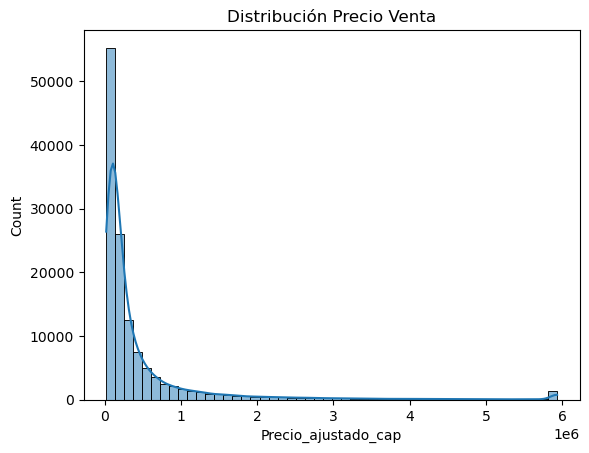

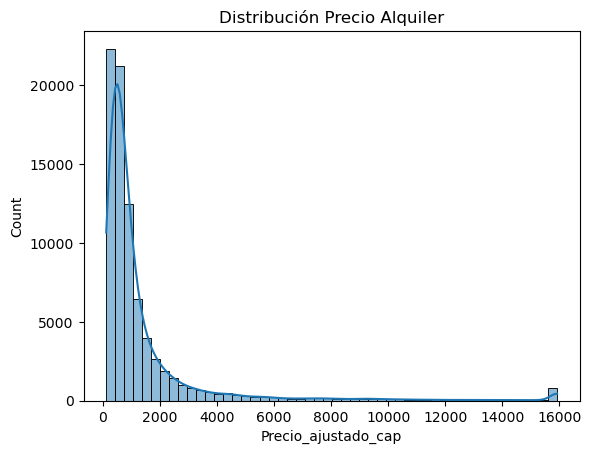

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df[df["Operacion"]=="venta"], x="Precio_ajustado_cap", bins=50, kde=True)
plt.title("Distribución Precio Venta")
plt.show()

sns.histplot(data=df[df["Operacion"]=="alquiler"], x="Precio_ajustado_cap", bins=50, kde=True)
plt.title("Distribución Precio Alquiler")
plt.show()


#### **Conclusiones de la Distribución de precios**

Venta

- Distribución muy sesgada a la derecha.
- La mayoría de las viviendas están por debajo de 300.000 €, con un pico muy fuerte en el rango bajo (~50.000–200.000 €).
- Aunque los precios están capados (P1–P99), aún se observan casos extremos hasta los 5–6 millones.

Alquiler

- También muy sesgada a la derecha.
- La mayoría de los alquileres se concentran entre 400–1.200 € al mes.
- Existen outliers significativos con precios de más de 10.000–15.000 €, pero son casos muy raros (pueden ser pisos muy lujosos).
- El patrón muestra claramente que la mediana (~700 €) es mucho más representativa que la media (~1.378 €).



### **Precios por distrito**

Ranking de distritos más caros y más baratos

In [377]:
precios_distrito = df.groupby(["Distrito","Operacion"])["Precio_ajustado_cap"].median().unstack()
print(precios_distrito.sort_values("venta", ascending=False).head(21))


Operacion             alquiler          venta
Distrito                                     
SALAMANCA          1019.355527  455326.568320
MONCLOAARAVACA      593.731458  422088.789608
CHAMARTIN           801.014504  383868.080973
CHAMBERI            938.512961  373036.915190
CENTRO              756.077840  292212.303002
RETIRO              825.270242  266278.904067
FUENCARRALELPARDO   735.741496  240191.005167
ARGANZUELA          707.789880  234837.338854
HORTALEZA           636.316935  229961.603876
BARAJAS             748.757926  224390.732441
VICALVARO           639.635960  164355.023081
TETUAN              679.713896  150082.790118
VILLADEVALLECAS     367.324753  145479.181301
CIUDADLINEAL        658.303661  131583.496272
MORATALAZ           625.167880  122365.046029
SANBLASCANILLEJAS   543.875485  115224.232679
LATINA              568.247865  114138.883936
USERA               500.335098  112182.056273
CARABANCHEL         524.259205  107200.461950
PUENTEDEVALLECAS    470.776254   9

#### **Conclusiones del ranking de precio por distrito**

**Venta (precio mediano)**

- Distritos más caros:

   - Salamanca (~455.000 €)
   - Moncloa-Aravaca (~422.000 €)
   - Chamartín (~383.000 €)
   - Chamberí (~377.000 €)
   - Centro (~292.000 €)

Coincide con las zonas premium de Madrid, con mayor demanda y oferta de alto nivel.

- Distritos más baratos:

   - Villaverde (~85.000 €)
   - Puente de Vallecas (~107.000 €)
   - Carabanchel (~120.000 €)
   - Usera (~142.000 €)
   - Latina (~155.000 €)

Zonas periféricas o tradicionalmente más asequibles.

**Alquiler (precio mediano, €/mes)**

- Más caros:

   - Salamanca (~1.020 €)
   - Chamberí (~939 €)
   - Chamartín (~801 €)
   - Centro (~756 €)
   - Retiro (~825 €)

- Más baratos:

   - Villaverde (~435 €)
   - Puente de Vallecas (~470 €)
   - Carabanchel (~524 €)
   - Usera (~520 €)
   - Latina (~569 €)

La brecha es clara: los distritos más caros en venta también lo son en alquiler.



Insights importantes

- Salamanca lidera tanto en venta como en alquiler - mercado de lujo consolidado.
- Distritos como Villaverde, Usera, Carabanchel y Puente de Vallecas concentran los precios más bajos, mostrando una clara segregación espacial.
- La relación venta–alquiler parece consistente: donde comprar es caro, también lo es alquilar.

### **Precio por m²**

In [383]:
# Calcular Precio por m² 
df["Precio_m2"] = df["Precio_ajustado_cap"] / df["Tamano"]

# Agrupar por Distrito y Operación
ranking_m2_op = (
    df.groupby(["Distrito", "Operacion"])["Precio_m2"]
    .median()
    .unstack()   
    .sort_values("venta", ascending=False)  # ordenar por precio de venta
)

print(ranking_m2_op.head(21))


Operacion           alquiler        venta
Distrito                                 
SALAMANCA          11.275638  3371.024183
CHAMBERI           11.540706  2891.476717
CENTRO             10.837421  2715.683106
CHAMARTIN           9.701644  2694.062181
ARGANZUELA         10.438738  2640.063692
MONCLOAARAVACA      7.361954  2360.292417
RETIRO              9.487043  2282.401083
FUENCARRALELPARDO   7.906412  2195.392060
BARAJAS             8.259268  2163.565346
HORTALEZA           7.519592  1876.051844
TETUAN              9.992737  1830.761259
VILLADEVALLECAS     8.123269  1702.615197
MORATALAZ           7.748428  1668.325920
VICALVARO           7.267030  1621.148774
CIUDADLINEAL        8.940016  1613.933204
LATINA              8.225682  1554.906799
CARABANCHEL         8.213992  1455.364761
SANBLASCANILLEJAS   7.795540  1442.947180
USERA               7.914315  1375.554125
PUENTEDEVALLECAS    8.256821  1320.218306
VILLAVERDE          7.350691  1225.201599


#### **Conclusiones del Precio por m²**

1. **Venta (€/m² de compra)**

Los distritos más caros son los esperados:

- Salamanca (~3.371 €/m²)
- Chamberí (~2.891 €/m²)
- Centro (~2.715 €/m²)
- Chamartín (~2.694 €/m²)
- Arganzuela (~2.640 €/m²)

Esto refleja la realidad del mercado madrileño, donde las zonas premium lideran.
La diferencia con distritos periféricos es enorme: Villaverde (~1.225 €/m²) o Puente de Vallecas (~1.320 €/m²).

2. **Alquiler (€/m² mensual)**

Los precios están mucho más bajos en valor absoluto porque son €/m² al mes:

- Salamanca (~11,3 €/m²)
- Chamberí (~11,5 €/m²)
- Centro (~10,8 €/m²)
- Chamartín (~9,7 €/m²)
- Arganzuela (~10,4 €/m²)

 Aquí también se observa el patrón esperado: los distritos premium en compra son igualmente los más caros en alquiler.

En la parte baja:

- Villaverde (~7,3 €/m²)
- Usera (~7,9 €/m²)
- San Blas (~7,8 €/m²)
- Carabanchel (~8,2 €/m²)

Reflejan la oferta más asequible.

Existe una brecha mayor en compra que en alquiler, lo cual es muy relevante para el análisis de accesibilidad y gentrificación.

### **Evolución temporal**

Precio mediano por año y operación.

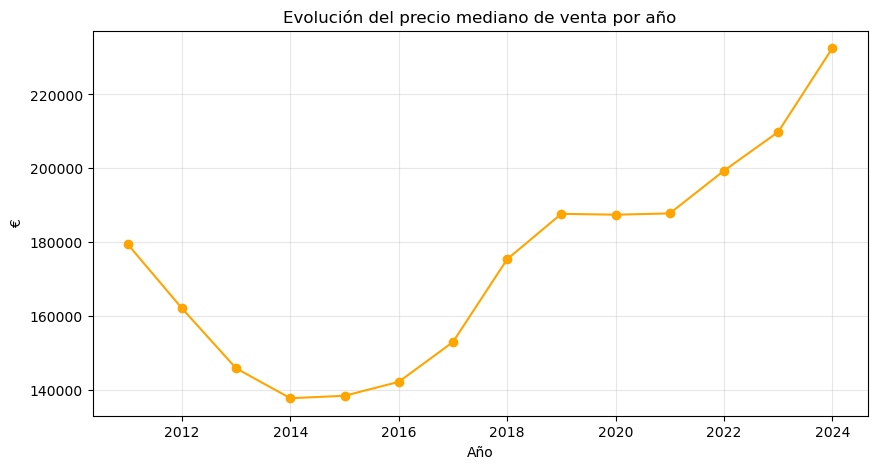

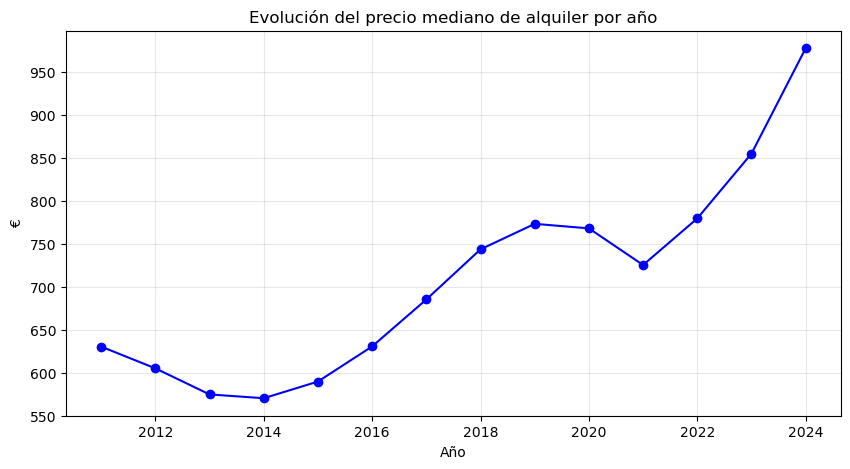

In [379]:
import matplotlib.pyplot as plt

# Datos agregados
evolucion = df.groupby(["Ano","Operacion"])["Precio_ajustado_cap"].median().unstack()

# Gráfico de evolución para venta
plt.figure(figsize=(10,5))
plt.plot(evolucion.index, evolucion["venta"], marker="o", color="orange")
plt.title("Evolución del precio mediano de venta por año")
plt.ylabel("€")
plt.xlabel("Año")
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de evolución para alquiler
plt.figure(figsize=(10,5))
plt.plot(evolucion.index, evolucion["alquiler"], marker="o", color="blue")
plt.title("Evolución del precio mediano de alquiler por año")
plt.ylabel("€")
plt.xlabel("Año")
plt.grid(True, alpha=0.3)
plt.show()


#### **Conclusión de Evolución Temporal**

1. Venta y alquiler muestran patrones muy parecidos:

- Caída fuerte hasta 2014.
- Recuperación sostenida desde 2015.
- Estancamiento/ligero retroceso en 2020–2021 (COVID).
- Crecimiento acelerado desde 2021.

2. El ritmo de subida post-2021 es más fuerte en alquiler que en venta, lo que sugiere presión de demanda y escasez de oferta en el mercado de arrendamiento.

3. Estos resultados permiten hablar de dos ciclos:

- 2011–2014: caída por crisis.
- 2015–2024: expansión, con récords actuales.

### **Influencia de características**

Comparar precios según atributos: ascensor, terraza, garaje, piscina…

In [380]:
caracteristicas = ["Ascensor","Terraza","Garaje","Piscina"]
for c in caracteristicas:
    print(c, "→", df.groupby(c)["Precio_ajustado_cap"].median())


Ascensor → Ascensor
False    64105.827184
True     76468.355785
Name: Precio_ajustado_cap, dtype: float64
Terraza → Terraza
False    67245.659500
True     86388.783654
Name: Precio_ajustado_cap, dtype: float64
Garaje → Garaje
False     67424.246385
True     128827.163057
Name: Precio_ajustado_cap, dtype: float64
Piscina → Piscina
False    70445.970439
True     49767.927904
Name: Precio_ajustado_cap, dtype: float64


#### **Conclusiones preliminares de la influencia de las características**

**1. Ascensor**
- Sin ascensor: ~64.100 €
- Con ascensor: ~76.400 €

Las viviendas con ascensor tienen un valor mediano un 20% más alto.
Esto es lógico en Madrid, especialmente en edificios antiguos del centro donde un ascensor marca una gran diferencia.

**2. Terraza**

- Sin terraza: ~67.200 €
- Con terraza: ~86.400 €

Una terraza incrementa el precio en torno a un 28%.
Refleja la fuerte demanda de espacios exteriores, sobre todo tras la pandemia.

**3. Garaje**

- Sin garaje: ~67.400 €
- Con garaje: ~128.800 €

Contar con garaje prácticamente duplica el precio mediano.
Esto es un hallazgo muy potente: el garaje no solo añade valor, sino que puede estar correlacionado con viviendas de mayor tamaño o en zonas con más poder adquisitivo.

**4. Piscina**

- Sin piscina: ~70.445 €
- Con piscina: ~49.768 €

Este resultado es contraintuitivo: parece que tener piscina se asocia a un precio menor.

Muchas viviendas con piscina están en urbanizaciones periféricas o en municipios con menor precio de suelo.

El dataset mezcla tanto pisos urbanos (caros, sin piscina) como chalets periféricos (más baratos, con piscina).

**Lectura general**

1. Ascensor, terraza y garaje tienen un impacto positivo muy claro en el precio.
2. La piscina no aparece como un atributo diferenciador positivo en este dataset, probablemente por un efecto de localización.
3. El garaje es el atributo más diferencial, seguido por la terraza y el ascensor.